In [1]:
import pandas as pd
import numpy as np
import PIL
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2024-05-11 13:39:03.626352: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-11 13:39:03.626445: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-11 13:39:03.747253: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


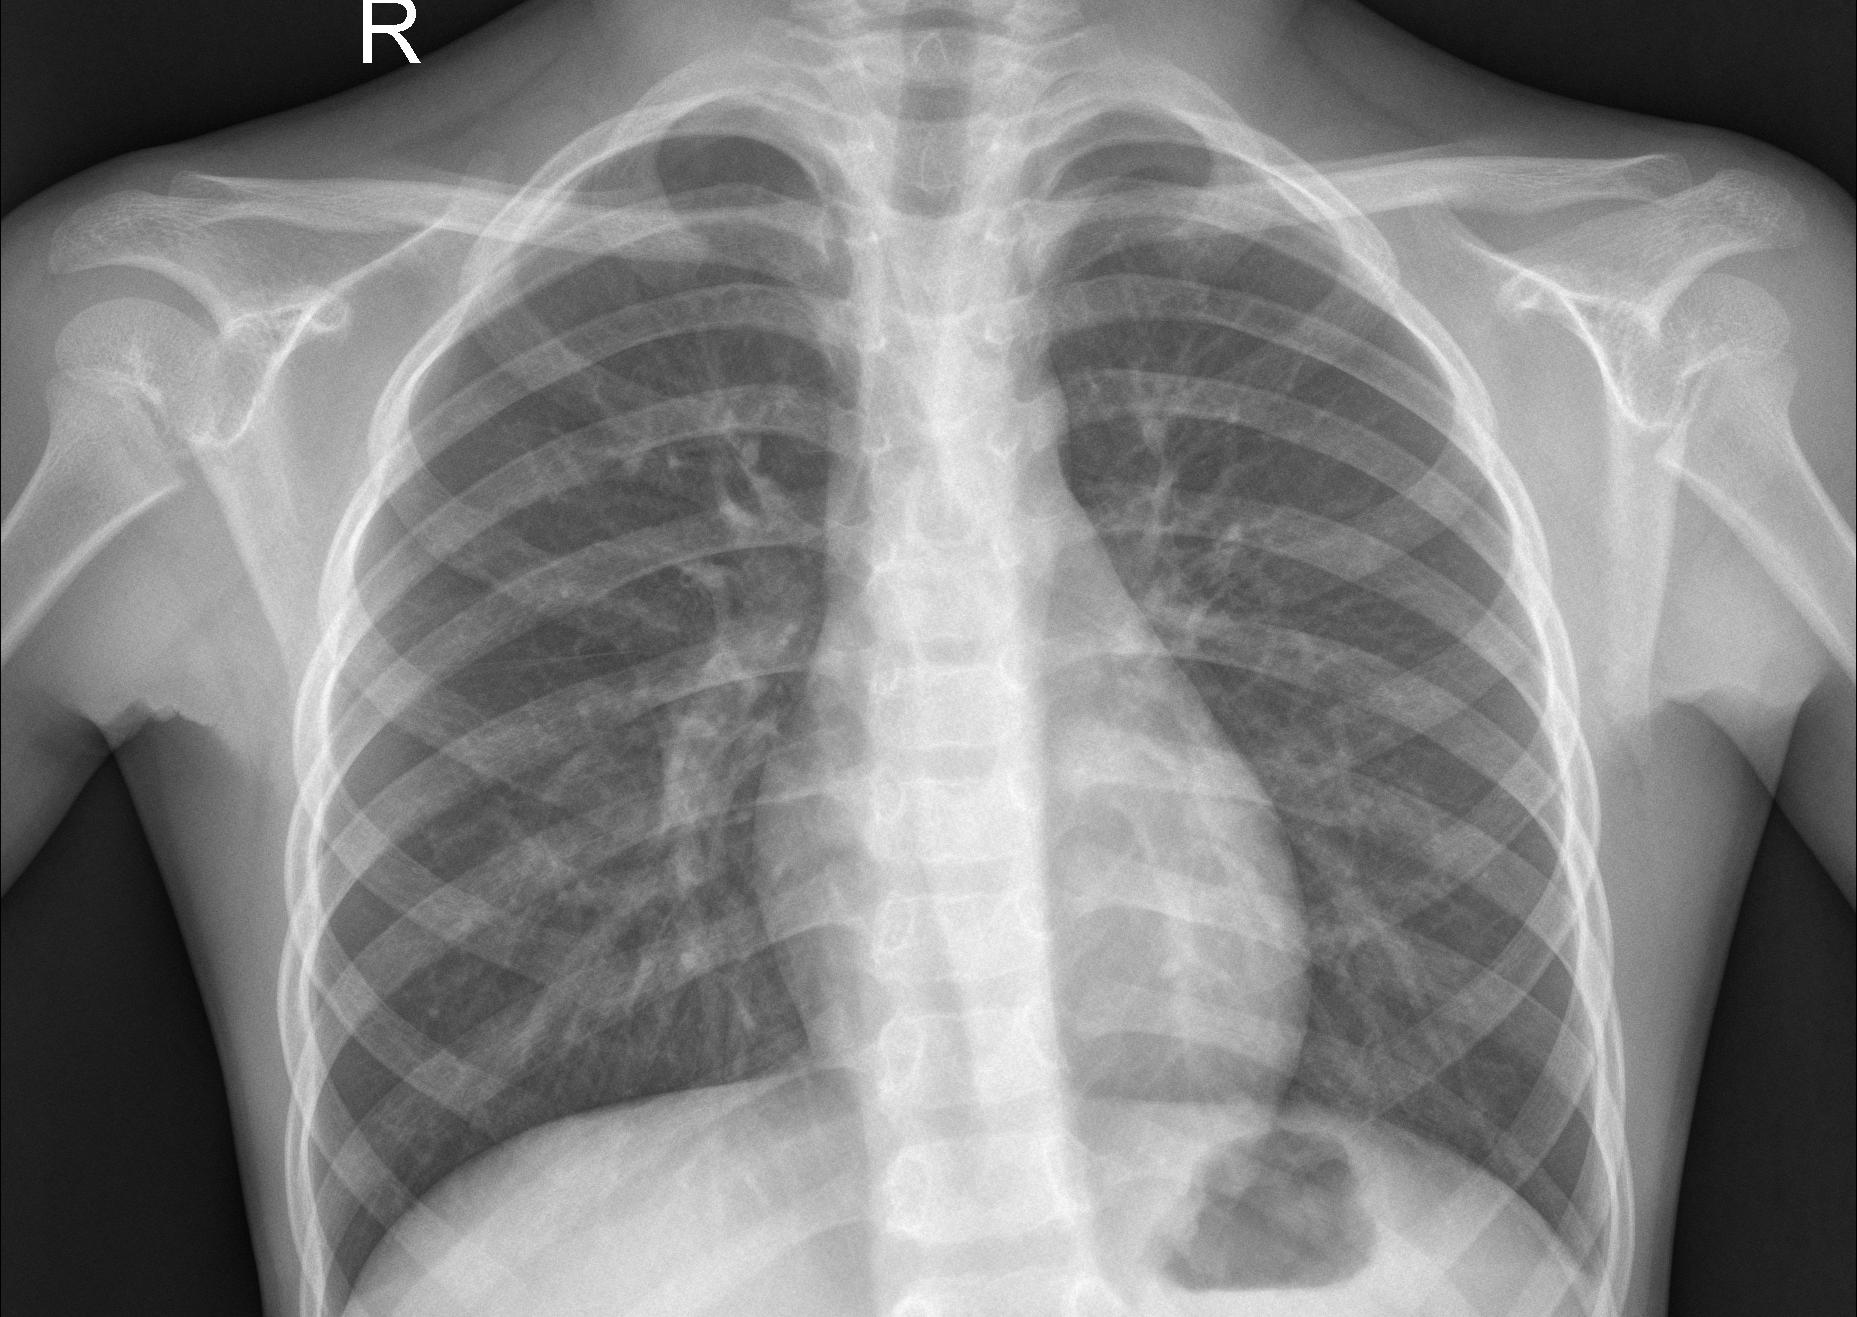

In [2]:
image = PIL.Image.open('/kaggle/input/chest-xray-pneumonia/chest_xray/test/NORMAL/IM-0001-0001.jpeg')

image

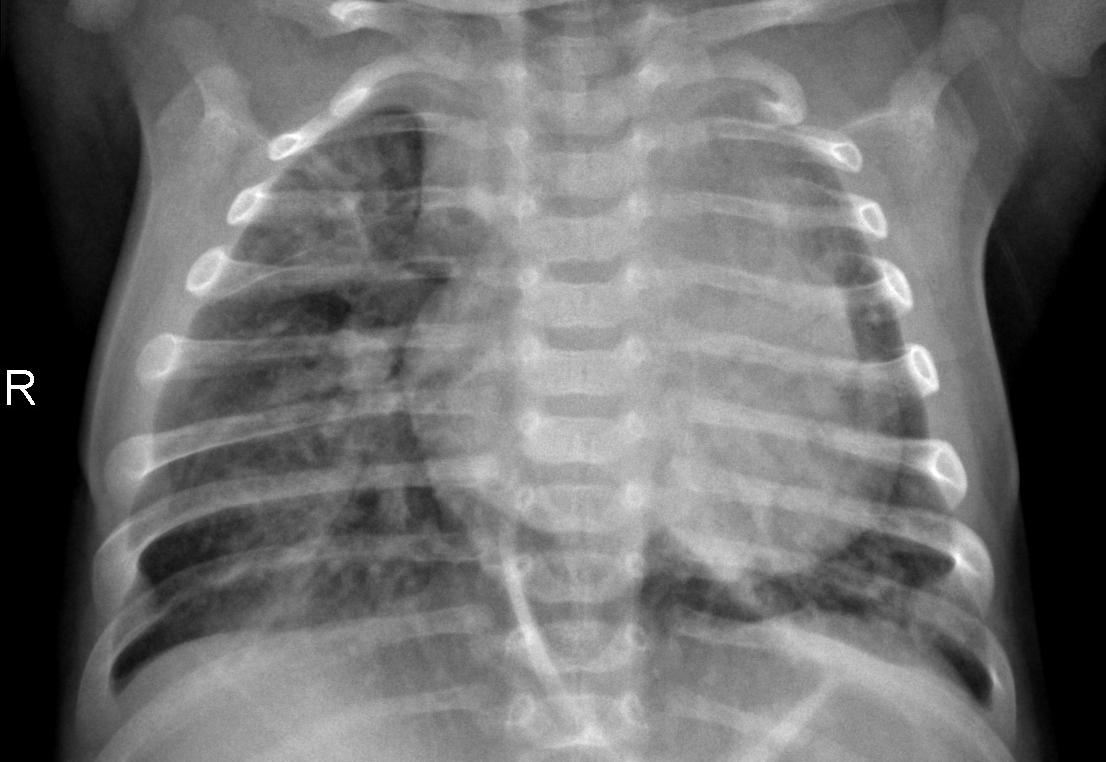

In [3]:
image = PIL.Image.open('/kaggle/input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/person100_bacteria_475.jpeg')

image

In [4]:
train = '/kaggle/input/chest-xray-pneumonia/chest_xray/train'
test = '/kaggle/input/chest-xray-pneumonia/chest_xray/test'
validation = '/kaggle/input/chest-xray-pneumonia/chest_xray/val'

In [5]:
training_generator = ImageDataGenerator(rescale=1/255)

data_train = training_generator.flow_from_directory(train, target_size=(256,256))

Found 5216 images belonging to 2 classes.


In [6]:
validation_generator = ImageDataGenerator(rescale=1/255)

data_valid = validation_generator.flow_from_directory(validation, target_size=(256,256))

Found 16 images belonging to 2 classes.


In [7]:
test_generator = ImageDataGenerator(rescale=1/255)

data_test = test_generator.flow_from_directory(test, target_size=(256,256))

Found 624 images belonging to 2 classes.


## CNN

In [8]:
from tensorflow.keras import regularizers

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',kernel_regularizer=regularizers.l2(0.001),input_shape=(256,256,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',kernel_regularizer=regularizers.l2(0.001)),
    #tf.keras.layers.MaxPooling2D(2,2),
    #tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    #tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    #tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(256,(3,3),activation='relu'),
    #tf.keras.layers.Conv2D(256,(3,3),activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    #tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(2,activation='sigmoid')
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [10]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['acc','f1_score'])

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 123, 123, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 121, 121, 256)  │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 119, 119, 128)  │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 117, 117, 32)   │        36,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 438048)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │    28,035,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,755,618 (109.69 MB)

 Trainable params: 28,755,618 (109.69 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5,verbose=1)
#checkpoint = tf.keras.callbacks.ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True, verbose=1)

In [13]:
# history = model.fit(data_train,epochs=100,validation_data=data_valid)
history = model.fit(
    data_train,
#     steps_per_epoch=len(data_train),
    epochs=20,
    validation_data=data_valid,
#     validation_steps=len(data_valid)
#     callbacks=[checkpoint]
    callbacks=[callbacks]
)

Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1715434844.530612      94 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1715434844.550801      94 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


163/163 ━━━━━━━━━━━━━━━━━━━━ 179s 572ms/step - acc: 0.7545 - f1_score: 0.5967 - loss: 1.1521 - val_acc: 0.7500 - val_f1_score: 0.7333 - val_loss: 0.5790
Epoch 2/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 54s 319ms/step - acc: 0.9189 - f1_score: 0.8910 - loss: 0.2506 - val_acc: 0.5000 - val_f1_score: 0.3333 - val_loss: 0.9864
Epoch 3/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 54s 318ms/step - acc: 0.9264 - f1_score: 0.9008 - loss: 0.2348 - val_acc: 0.8125 - val_f1_score: 0.8057 - val_loss: 0.5403
Epoch 4/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 54s 318ms/step - acc: 0.9639 - f1_score: 0.9516 - loss: 0.1155 - val_acc: 0.6875 - val_f1_score: 0.6537 - val_loss: 0.4420
Epoch 5/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 54s 318ms/step - acc: 0.9715 - f1_score: 0.9627 - loss: 0.0967 - val_acc: 0.9375 - val_f1_score: 0.9373 - val_loss: 0.3391
Epoch 6/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 54s 320ms/step - acc: 0.9779 - f1_score: 0.9706 - loss: 0.0811 - val_acc: 0.8750 - val_f1_score: 0.8730 - val_loss: 0.2316
Epoch 7/20
163/163 ━━━━━━━━━━━━━

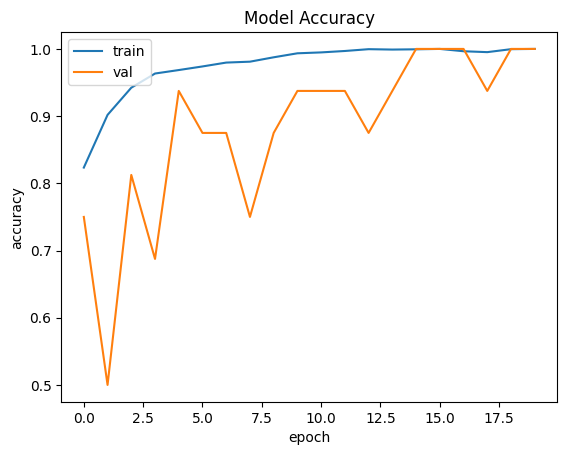

In [14]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy'),
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

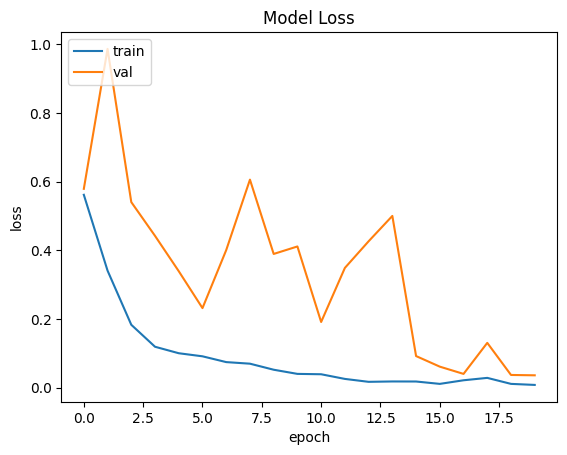

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss'),
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

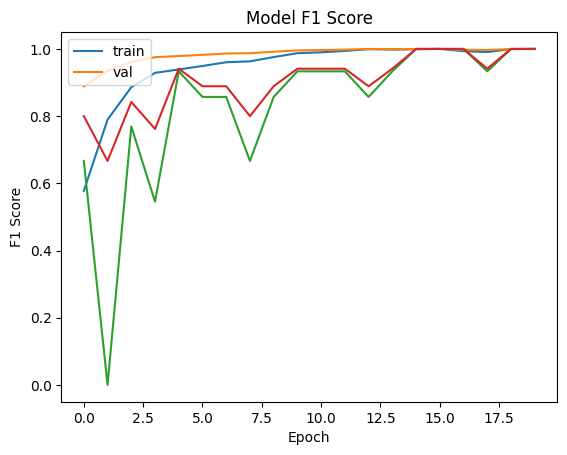

In [16]:
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title("Model F1 Score")
plt.ylabel("F1 Score")
plt.xlabel("Epoch")
plt.legend(['train','val'],loc="upper left")
plt.show()

In [17]:
y_pred = model.predict(data_test)

 2/20 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step 

W0000 00:00:1715435997.435211      95 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 389ms/step


In [18]:
print(y_pred)

[[6.3739907e-16 1.0000000e+00]
 [2.2057335e-25 1.0000000e+00]
 [8.5096774e-09 1.0000000e+00]
 ...
 [9.9999928e-01 9.6668978e-04]
 [9.9993062e-01 1.0229010e-05]
 [2.3203277e-24 1.0000000e+00]]


In [19]:
score = model.evaluate(data_test)

 1/20 ━━━━━━━━━━━━━━━━━━━━ 18s 998ms/step - acc: 0.7500 - f1_score: 0.7409 - loss: 3.6780

W0000 00:00:1715436007.532288      95 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 227ms/step - acc: 0.7803 - f1_score: 0.7223 - loss: 3.7963


In [20]:
score

[3.9895286560058594,
 0.7756410241127014,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.5757575, 0.8474945], dtype=float32)>]

In [21]:
my_model = model.save('/kaggle/working/my_model.h5')

In [22]:
from tensorflow.keras.models import load_model
model = load_model('my_model.h5')

In [23]:
model.predict(data_test)

 2/20 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step 

W0000 00:00:1715436016.605744      94 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 244ms/step


array([[2.2774704e-03, 9.9857152e-01],
       [1.5770370e-03, 9.7054964e-01],
       [9.9757844e-01, 3.4543154e-06],
       ...,
       [4.4373488e-03, 9.8867476e-01],
       [2.2172342e-08, 1.0000000e+00],
       [1.0000000e+00, 8.5317216e-15]], dtype=float32)